In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv(r"C:\Users\SSS\Downloads\iris.csv",header=None,names=["sl","sw","pl","pw","species"])
data

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
d=data.copy()

In [4]:
d.head(2)

,sl,sw,pl,pw,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [5]:
fv=d.drop(["species"],axis=1)
label=data[["species"]]

In [8]:
fv.head(2)

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [9]:
label.head(2)

,species
0,Iris-setosa
1,Iris-setosa


In [10]:
label.value_counts()

species        
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [6]:
lb=LabelEncoder()             # labelencoder-becoz categorical column is label,if feature use onehot encoding
label=lb.fit_transform(label["species"]) 

In [7]:
pd.Series(label)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int32

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.7)
# If running mutiple times,we get different random datapoints

In [17]:
x_train

,sl,sw,pl,pw
133,6.3,2.8,5.1,1.5
41,4.5,2.3,1.3,0.3
146,6.3,2.5,5.0,1.9
15,5.7,4.4,1.5,0.4
102,7.1,3.0,5.9,2.1
...,...,...,...,...
50,7.0,3.2,4.7,1.4
24,4.8,3.4,1.9,0.2
7,5.0,3.4,1.5,0.2
22,4.6,3.6,1.0,0.2


In [18]:
x_train.shape

(105, 4)

In [19]:
x_test.shape

(45, 4)

In [20]:
y_train.shape

(105,)

In [22]:
y_train

array([2, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1,
       2, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 2])

In [21]:
y_test.shape

(45,)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn=KNeighborsClassifier(n_neighbors=1) # n_neighbors-k value
model=knn.fit(x_train,y_train) # fit-saving ur values to memory,not learning anything

In [12]:
y_predic=model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_predic)

0.9777777777777777

In [37]:
def knn(k):
    for i in range(1,10,2):
        if k==i:
            knn=KNeighborsClassifier(n_neighbors=i) # n_neighbors-k value
            model=knn.fit(x_train,y_train)
            y_predic=model.predict(x_test)
            accuracy=accuracy_score(y_test,y_predic)
            print(accuracy)
knn(7)            

0.9333333333333333


In [38]:
knn(1)

0.9111111111111111


In [39]:
knn(3)

0.9111111111111111


In [40]:
knn(5)

0.9333333333333333


In [41]:
knn(9)

0.9333333333333333


In [14]:
x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.8)
x_trainf,x_cv,y_trainf,y_cv=train_test_split(x_train,y_train,train_size=0.8)

In [61]:
x_trainf.shape

(96, 4)

In [62]:
y_trainf.shape

(96,)

In [63]:
x_cv.shape

(24, 4)

In [64]:
y_cv.shape

(24,)

In [15]:
tr_er=[]
cv_er=[]
kv=[]
for k in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k) 
    model=knn.fit(x_trainf,y_trainf)
    y_predic=model.predict(x_trainf)
    tr_er.append(1-accuracy_score(y_trainf,y_predic))
           
    y_predi=model.predict(x_cv)
    cv_er.append(1-accuracy_score(y_cv,y_predi))                   

In [16]:
tr_er

[0.0,
 0.03125,
 0.01041666666666663,
 0.02083333333333337,
 0.01041666666666663,
 0.03125,
 0.02083333333333337,
 0.01041666666666663,
 0.04166666666666663,
 0.05208333333333337]

In [21]:
k=[y for y in range(1,20,2)]
k

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [17]:
cv_er

[0.08333333333333337,
 0.08333333333333337,
 0.08333333333333337,
 0.08333333333333337,
 0.125,
 0.125,
 0.08333333333333337,
 0.08333333333333337,
 0.04166666666666663,
 0.08333333333333337]

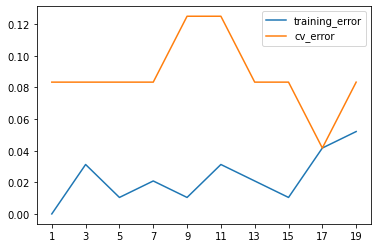

In [25]:
plt.plot(k,tr_er,label="training_error")
plt.plot(k,cv_er,label="cv_error")
plt.xticks(k)
plt.legend()

In [ ]:
# best k value is 15

In [26]:
knn=KNeighborsClassifier(n_neighbors=15)   # dont run again ,hear x_test is unseen data
model=knn.fit(x_trainf,y_trainf)
predict=model.predict(x_test)
accuracy_score(y_test,predict)

0.9666666666666667

In [ ]:
# above is our final model ,we get generalised accuracy of 0.966

In [27]:
model.predict([[1.2,2.3,4.5,3.4]])  #double list bcoz row vector  # for 4 features give unseen and check which flower it is

C:\Users\SSS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# array([1]) ,label 1-versicolor

In [65]:
from sklearn.model_selection import KFold

In [67]:
k=KFold(n_splits=3)   # 3 fold  ,3 times iteration

In [68]:
for train_index,cv_index in k.split([1,2,3,4,5,6,7,8,9]):  # 9 datapoints,3 datapoints in 3 folds
    print(train_index,cv_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [ ]:
# in 1st iteration training datapoints =[3 4 5 6 7 8] ,cv datapoints=[0 1 2]  these are index values like wise 2nd ,3rd iteration 

In [69]:
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test=train_test_split(fv,label,train_size=0.7)

In [70]:
l=cross_val_score(KNeighborsClassifier(n_neighbors=1),x_train,y_train,cv=3)  # cv-no of folds

In [74]:
l  # for k=1 ---->3 accuracy is there,take average becoz of 3 times of iteration

array([0.85714286, 1.        , 0.97142857])

In [71]:
import numpy as np

In [72]:
np.mean(l)

0.9619047619047619

In [73]:
for k in range(1,20,2):
    l=cross_val_score(KNeighborsClassifier(n_neighbors=k),x_train,y_train,cv=3)
    print("for this {}=={}".format(k,np.mean(l)))

for this 1==0.9619047619047619
for this 3==0.9428571428571427
for this 5==0.9523809523809524
for this 7==0.942857142857143
for this 9==0.9523809523809524
for this 11==0.9523809523809524
for this 13==0.9333333333333332
for this 15==0.942857142857143
for this 17==0.9333333333333332
for this 19==0.942857142857143


In [ ]:
# best k value is 1